
# The Spark Foundation-GRIP(Data Science and Business analytics)

# Task1- Prediction using Supervised Machine Learning

# Author-Manju Maurya

# Problem:

-> Predict the percentage of a student based on the number of study hours.

-> what will be predicted score if a student studies for 9.25 hrs/day.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("data.csv")

In [3]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
data.shape

(25, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualization of data

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

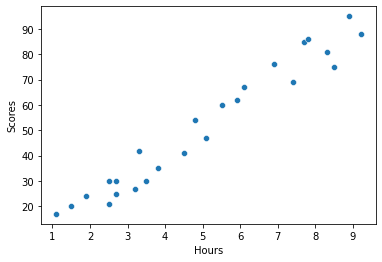

In [8]:
sns.scatterplot(x=data['Hours'],y=data['Scores'])

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

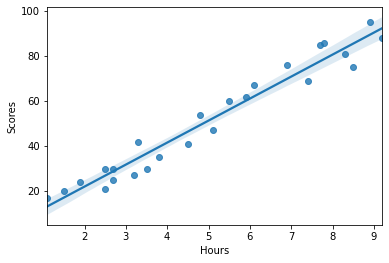

In [9]:
sns.regplot(x=data['Hours'],y=data['Scores'])

<AxesSubplot:ylabel='Scores'>

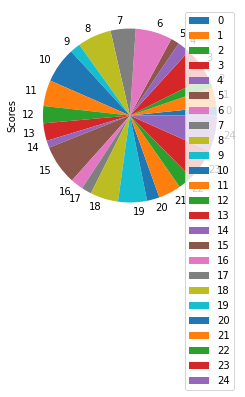

In [10]:
data.plot.pie(x='Hours',y='Scores')

# Preparing the data

In [11]:

x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [12]:
#the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size=0.2, random_state=0) 
                           

# Model building
1. Using Linear regression

In [13]:
#Training the Algorithm
#We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [14]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) #train the model
print("Training complete.")

Training complete.


# Making Predictions

In [15]:

#Now that we have trained our algorithm, it's time to make some predictions.

In [16]:

y_pred = regressor.predict(x_test) # Predicting the scores


In [17]:
df=pd.DataFrame({'Actual': y_test, "Predicted": y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<AxesSubplot:ylabel='Density'>

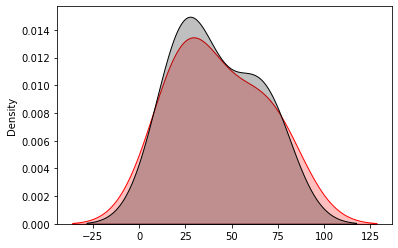

In [18]:
#distribution plot in between actual and predicted

sns.kdeplot(y_pred,label="predicted",shade=True,color='Red');

sns.kdeplot(data=y_test,label='actual',shade=True,color='black')

In [19]:
print("train accuracy: ",regressor.score(x_train,y_train),'\n test accuracy: ',regressor.score(x_test,y_test))

train accuracy:  0.9515510725211552 
 test accuracy:  0.9454906892105356


In [20]:
#predict with custom input that is we have to predict score if a student studies for 9.25 hrs/day


In [21]:
hours=[[9.25]]
pred=regressor.predict(hours)
print(pred)

[93.69173249]


In [22]:
#evaluating the model

In [23]:
from sklearn import metrics
print("mean absolute error:",metrics.mean_absolute_error(y_test,y_pred))

mean absolute error: 4.183859899002975


# Model building 
2.using Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor
regressor= RandomForestRegressor(n_estimators=1000,random_state=42)

In [25]:
regressor.fit(x_train, y_train) 
print("Training complete.")

Training complete.


In [26]:

y_pred = regressor.predict(x_test) # Predicting the scores


In [27]:
df=pd.DataFrame({'Actual': y_test, "Predicted": y_pred})
df

,Actual,Predicted
0,20,19.328000
1,27,37.459310
2,69,84.279000
3,30,23.361417
4,62,63.702000


In [28]:
print("train accuracy: ",regressor.score(x_train,y_train),'\n test accuracy: ',regressor.score(x_test,y_test))

train accuracy:  0.9905921446159305 
 test accuracy:  0.8030162662081245


In [29]:
hours=[[9.25]]
pred=regressor.predict(hours)
print(pred)

[88.488]


In [30]:
from sklearn import metrics
print("mean absolute error:",metrics.mean_absolute_error(y_test,y_pred))

mean absolute error: 6.950178571428571
